# AVANCE DE MÓDULO 3

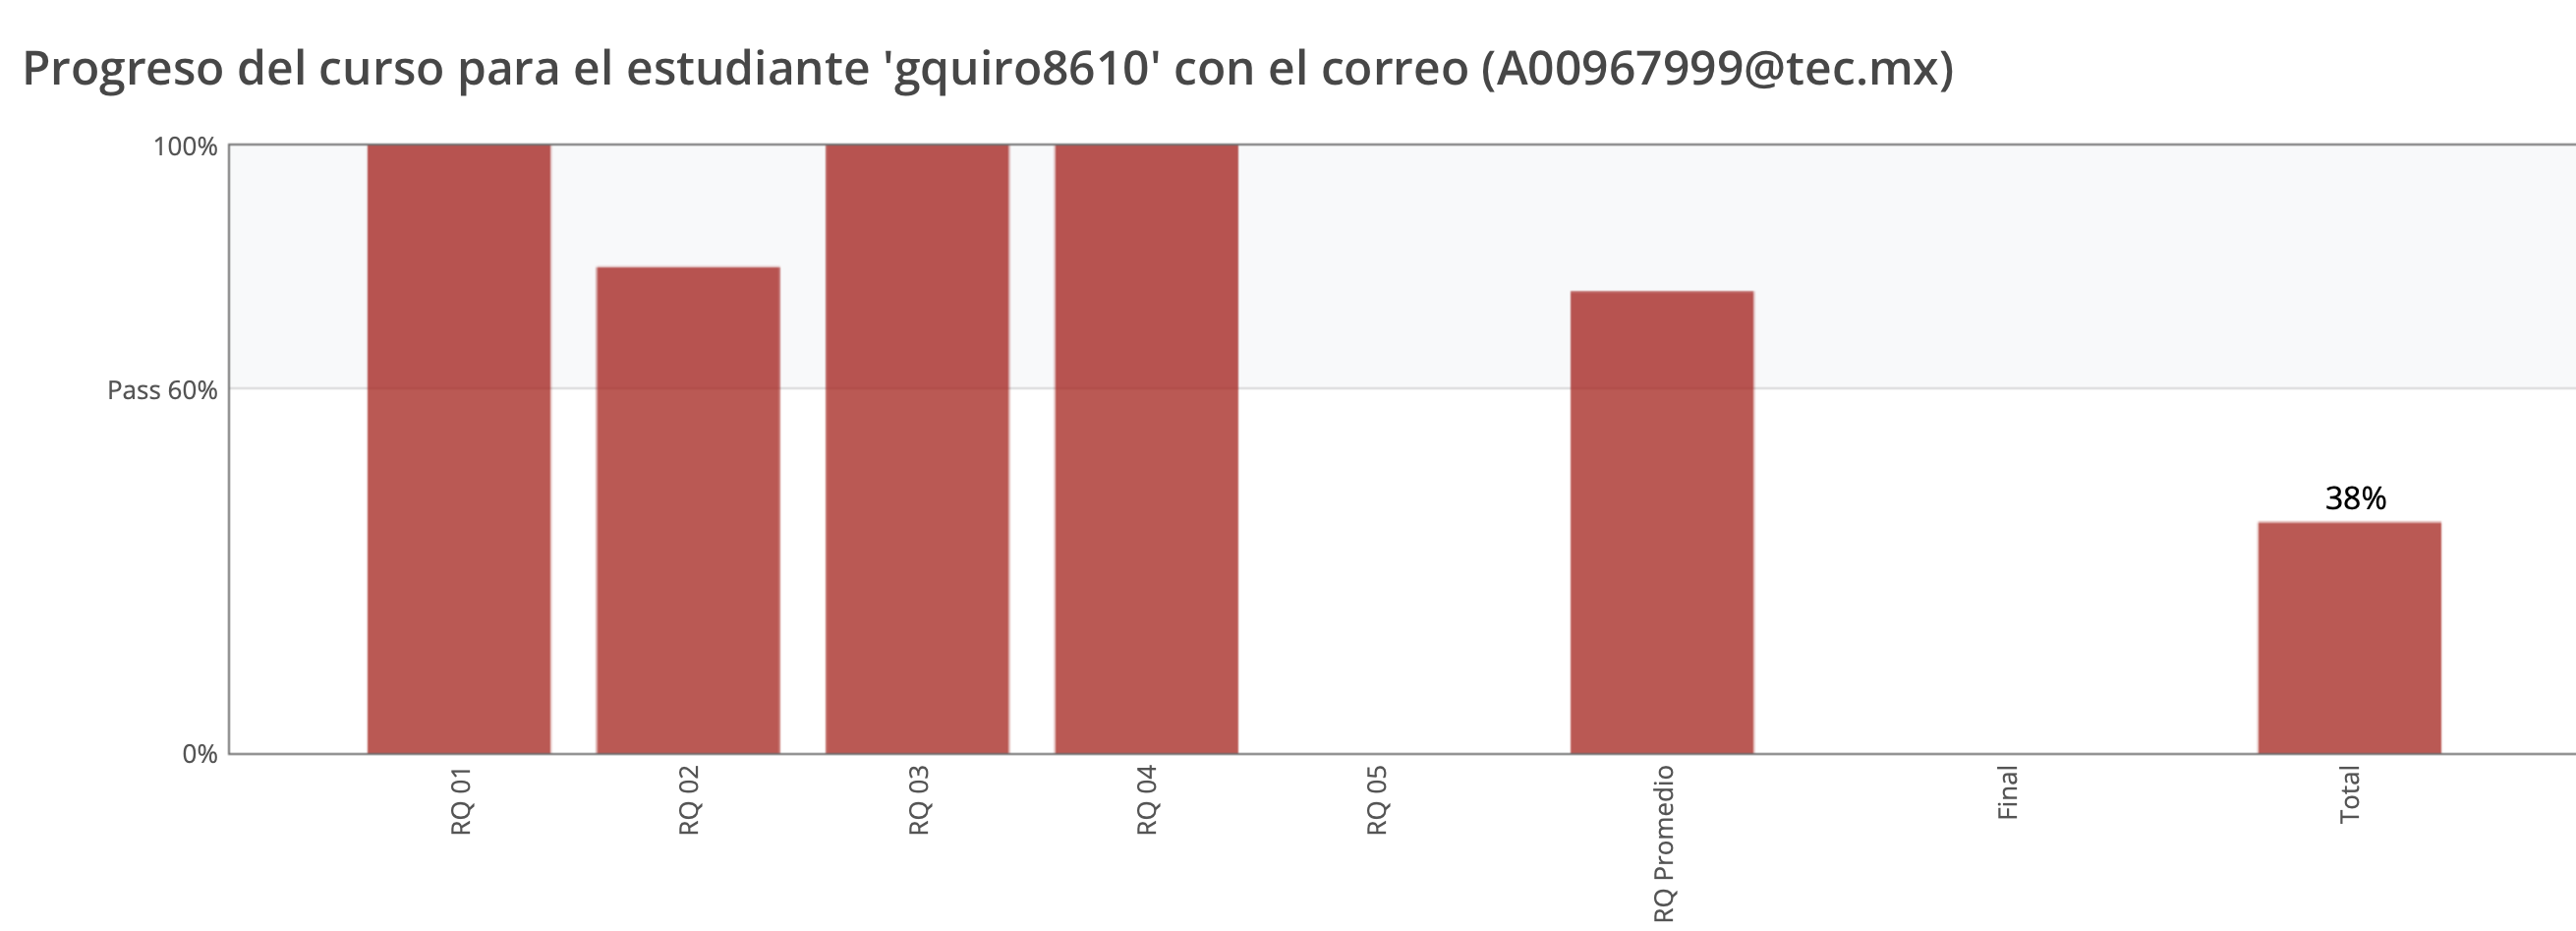


<h2 id="download">Download Data</h2>


In [2]:
## Uncomment these if working locally, else let the following code cell run.

# import urllib.request
# url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/example1.txt'
# filename = 'Example1.txt'
# urllib.request.urlretrieve(url, filename)

## Download Example file
# !wget -O /resources/data/Example1.txt https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/example1.txt

In [3]:
from pyodide.http import pyfetch
import pandas as pd

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/data/example1.txt"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


await download(filename, "Example1.txt")

<hr>


<h2 id="read">Reading Text Files</h2>


One way to read or write a file in Python is to use the built-in <code>open</code> function. The <code>open</code> function provides a **File object** that contains the methods and attributes you need in order to read, save, and manipulate the file. In this notebook, we will only cover **.txt** files. The first parameter you need is the file path and the file name. An example is shown as follow:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/images/ReadOpen.png" width="500" />


The mode argument is optional and the default value is **r**. In this notebook we only cover two modes:

<ul>
    <li>**r**: Read mode for reading files </li>
    <li>**w**: Write mode for writing files</li>
</ul>


For the next example, we will use the text file **Example1.txt**. The file is shown as follows:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/images/ReadFile.png" width="100" />


We read the file:


In [4]:
# Read the Example1.txt
example1 = "Example1.txt"
file1 = open(example1, "r")


We can view the attributes of the file.


The name of the file:


In [5]:
# Print the path of file

file1.name

'Example1.txt'

The mode the file object is in:


In [6]:
# Print the mode of file, either 'r' or 'w'

file1.mode

'r'

We can read the file and assign it to a variable :


In [7]:
# Read the file

FileContent = file1.read()
FileContent

'This is line 1 \nThis is line 2\nThis is line 3'

The **/n** means that there is a new line.


We can print the file:


In [8]:
# Print the file with '\n' as a new line

print(FileContent)

This is line 1 
This is line 2
This is line 3


The file is of type string:


In [9]:
# Type of file content

type(FileContent)

str

It is very important that the file is closed in the end. This frees up resources and ensures consistency across different python versions.


In [10]:
# Close file after finish

file1.close()

<hr>


<h2 id="better">A Better Way to Open a File</h2>


Using the <code>with</code> statement is better practice, it automatically closes the file even if the code encounters an exception. The code will run everything in the indent block then close the file object.


In [11]:
# Open file using with

with open(example1, "r") as file1:
    FileContent = file1.read()
    print(FileContent)

This is line 1 
This is line 2
This is line 3


The file object is closed, you can verify it by running the following cell:


In [12]:
# Verify if the file is closed

file1.closed

True

We can see the info in the file:


In [13]:
# See the content of file

print(FileContent)

This is line 1 
This is line 2
This is line 3


The syntax is a little confusing as the file object is after the <code>as</code> statement. We also don’t explicitly close the file. Therefore we summarize the steps in a figure:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/images/ReadWith.png" width="500" />


We don’t have to read the entire file, for example, we can read the first 4 characters by entering three as a parameter to the method **.read()**:


In [14]:
# Read first four characters

with open(example1, "r") as file1:
    print(file1.read(4))

This


Once the method <code>.read(4)</code> is called the first 4 characters are called. If we call the method again, the next 4 characters are called. The output for the following cell will demonstrate the process for different inputs to the method <code>read()</code>:


In [15]:
# Read certain amount of characters

with open(example1, "r") as file1:
    print(file1.read(4))
    print(file1.read(4))
    print(file1.read(7))
    print(file1.read(15))

This
 is 
line 1 

This is line 2


The process is illustrated in the below figure, and each color represents the part of the file read after the method <code>read()</code> is called:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%204/images/read.png" width="500" />


Here is an example using the same file, but instead we read 16, 5, and then 9 characters at a time:


In [16]:
# Read certain amount of characters

with open(example1, "r") as file1:
    print(file1.read(16))
    print(file1.read(5))
    print(file1.read(9))

This is line 1 

This 
is line 2


We can also read one line of the file at a time using the method <code>readline()</code>:


In [17]:
# Read one line

with open(example1, "r") as file1:
    print("first line: " + file1.readline())

first line: This is line 1 



We can also pass an argument to <code> readline() </code> to specify the number of charecters we want to read. However, unlike <code> read()</code>, <code> readline()</code> can only read one line at most.


In [18]:
with open(example1, "r") as file1:
    print(file1.readline(20)) # does not read past the end of line
    print(file1.read(20)) # Returns the next 20 chars


This is line 1 

This is line 2
This 


We can use a loop to iterate through each line:


In [19]:
# Iterate through the lines

with open(example1,"r") as file1:
        i = 0;
        for line in file1:
            print("Iteration", str(i), ": ", line)
            i = i + 1

Iteration 0 :  This is line 1 

Iteration 1 :  This is line 2

Iteration 2 :  This is line 3


We can use the method <code>readlines()</code> to save the text file to a list:


In [20]:
# Read all lines and save as a list

with open(example1, "r") as file1:
    FileasList = file1.readlines()

Each element of the list corresponds to a line of text:


In [21]:
# Print the first line

FileasList[0]

'This is line 1 \n'

# Print the second line

FileasList\[1]


In [22]:
# Print the third line

FileasList[2]

'This is line 3'

<hr>
<h2>The last exercise!</h2>
<p>Congratulations, you have completed your first lesson and hands-on lab in Python.
<hr>


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Other contributors

<a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">Mavis Zhou</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                        |
| ----------------- | ------- | ------------- | --------------------------------------------------------- |
| 2022-01-10        | 2.1     | Malika        | Removed the readme for GitShare                           |
| 2020-09-30        | 1.3     | Malika        | Deleted exericse "Weather Data"                           |
| 2020-09-30        | 1.2     | Malika Singla | Weather Data dataset link added                           |
| 2020-09-30        | 1.1     | Arjun Swani   | Added exericse "Weather Data"                             |
| 2020-09-30        | 1.0     | Arjun Swani   | Added blurbs about closing files and read() vs readline() |
| 2020-08-26        | 0.2     | Lavanya       | Moved lab to course repo in GitLab                        |
|                   |         |               |                                                           |
|                   |         |               |                                                           |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
